# Modeling Coverage for Neural Machine Translation
# https://arxiv.org/abs/1601.04811

# 📘 Academic Summary: Coverage-based Neural Machine Translation

## 🧠 Abstract
The paper addresses a key weakness in attention-based neural machine translation (NMT): the lack of coverage modeling. Without explicit tracking of source words already translated, NMT often suffers from **over-translation** and **under-translation**. The authors propose **coverage-based NMT (NMT-COVERAGE)**, which introduces a coverage vector to record attention history and guide future attention. Experiments on Chinese–English translation show significant improvements in translation quality and alignment accuracy over conventional attention-based NMT.

---

## 🎯 Problem
- **Over-translation**: some words are translated multiple times.  
- **Under-translation**: some words are omitted.  
- Root cause: Standard attention models do not track whether source words have already been translated.

---

## 🏆 Purpose
- Introduce a **coverage mechanism** into NMT that explicitly tracks translation history.  
- Reduce systematic errors in attention-based NMT using coverage vectors.  
- Demonstrate that modeling coverage improves **translation adequacy, fluency, and alignment**.

---

## 🏗️ Methodology
- **Coverage Vector**: Maintains history of attention for each source word.  
- **Linguistic Coverage Model**: Accumulates alignment probabilities, optionally including *fertility* (expected number of target words from a source word).  
- **Neural Coverage Model**: Uses neural networks (e.g., GRUs) to learn flexible, dynamic coverage representations.  
- **Integration with Attention**: Coverage vectors are fed into the attention mechanism, reducing the chance of re-translating already attended words.  
- **Training**: End-to-end maximum likelihood estimation on large-scale Chinese–English corpora.  
- **Evaluation Metrics**:  
  - Translation quality: **BLEU**  
  - Alignment quality: **AER** (Alignment Error Rate) and **SAER** (Soft AER)  
  - Human evaluation: adequacy and fluency  

---

## 📊 Results
- **BLEU**: Up to **+1.8 BLEU** over baseline attention-based NMT (GroundHog).  
- **Error Reduction**: Coverage model reduced *under-translation* by ~33% and *over-translation* by ~40%.  
- **Alignment**: Lower AER and SAER, with **fertility-based linguistic coverage** and **high-dimensional neural coverage** performing best.  
- **Long Sentences**: Mitigated performance drops on long sequences, producing more complete translations.  

---

## ✅ Conclusion
The proposed **coverage-based NMT** alleviates both over-translation and under-translation by incorporating translation history into attention. Both **linguistic** and **neural coverage models** significantly improve **translation quality** and **alignment accuracy**. This work demonstrates that importing **coverage concepts from statistical MT** into neural models enhances reliability, especially for **longer sentences**.


# 📐 Mathematical & Statistical Equations in Coverage-based NMT

---

## 1. Standard NMT Objective
For a source sentence  
$$x = (x_1, \dots, x_J)$$  
and target sentence  
$$y = (y_1, \dots, y_I),$$  

the conditional probability is:

$$
P(y \mid x) = \prod_{i=1}^I P(y_i \mid y_{<i}, x)
$$

---

## 2. Decoder Probability
At each decoding step $i$:

$$
P(y_i \mid y_{<i}, x) = g(y_{i-1}, s_i, c_i)
$$

where:  
- $s_i$: decoder hidden state,  
- $c_i$: context vector,  
- $g(\cdot)$: softmax output function.

---

## 3. Decoder State Update
Recurrent update rule:

$$
s_i = f(s_{i-1}, y_{i-1}, c_i)
$$

---

## 4. Attention Context Vector
The context vector:

$$
c_i = \sum_{j=1}^J \alpha_{i,j} h_j
$$

where $h_j$ is the encoder hidden state.

---

## 5. Attention Weights
Softmax attention:

$$
\alpha_{i,j} = \frac{\exp(e_{i,j})}{\sum_{k=1}^J \exp(e_{i,k})}
$$

with attention score:

$$
e_{i,j} = a(s_{i-1}, h_j)
$$

---

## 6. Coverage-Augmented Attention
Coverage vector at step $i$ for source word $j$:

$$
c_{i,j} = \text{Coverage}(c_{i-1,j}, \alpha_{i-1,j})
$$

Modified attention score:

$$
e_{i,j} = a(s_{i-1}, h_j, c_{i-1,j})
$$

---

## 7. Linguistic Coverage (Fertility-Based)
Coverage defined as normalized cumulative attention:

$$
c_{i,j} = \frac{1}{\Phi_j} \sum_{k=1}^{i-1} \alpha_{k,j}
$$

where $\Phi_j$ is the fertility of source word $x_j$.

Fertility prediction:

$$
\Phi_j = N \cdot \sigma(U_f h_j)
$$

- $N$: predefined maximum fertility,  
- $\sigma$: sigmoid function,  
- $U_f$: learned parameter.

---

## 8. Neural Coverage Model
Coverage updated dynamically with a GRU:

$$
c_{i,j} = \text{GRU}(c_{i-1,j}, \alpha_{i-1,j}, h_j, s_{i-1})
$$

---

## 9. Training Objective
Maximum likelihood estimation (MLE):

$$
L(\theta) = \sum_{n=1}^N \log P(y^{(n)} \mid x^{(n)}; \theta)
$$

---

## 10. Evaluation Metrics
**BLEU Score** (Papineni et al., 2002):  

$$
BLEU = BP \cdot \exp\left(\sum_{n=1}^N w_n \log p_n\right)
$$

- $p_n$: n-gram precision,  
- $w_n$: weights,  
- $BP$: brevity penalty.

**Alignment Error Rate (AER):**

$$
AER = 1 - \frac{|A \cap S| + |A \cap P|}{|A| + |S|}
$$

- $A$: predicted alignment,  
- $S$: sure links,  
- $P$: possible links.

---

## ✅ Summary
- Standard NMT: conditional probability + attention-based context.  
- Coverage mechanism augments attention with history of translations.  
- Two models:
  - **Linguistic coverage**: normalized cumulative attention (fertility-based).  
  - **Neural coverage**: GRU-driven dynamic updates.  
- Training: Maximum likelihood.  
- Evaluation: BLEU (translation quality), AER (alignment quality).  


# Coverage Mechanism in Neural Machine Translation
```
Source Sentence Encoding:
┌─────┐   ┌─────┐   ┌─────┐        ┌─────┐
│ h1  │   │ h2  │   │ h3  │  ...   │ hJ  │
└──┬──┘   └──┬──┘   └──┬──┘        └──┬──┘
   │         │         │              │
   └─────────┴─────────┴──────────────┘
                Encoder

Decoding with Attention + Coverage:
──────────────────────────────────────────────

Step i=1:
┌─────┐
│ s0  │  (decoder state)
└──┬──┘
   │
   ▼
 Attention over {h1,...,hJ} → α1,j
 Coverage initialized:
   c1,j = α1,j

──────────────────────────────────────────────

Step i=2:
┌─────┐
│ s1  │
└──┬──┘
   │
   ▼
 Attention → α2,j
 Coverage update:
   c2,j = c1,j + α2,j

──────────────────────────────────────────────

Step i=3:
┌─────┐
│ s2  │
└──┬──┘
   │
   ▼
 Attention → α3,j
 Coverage update:
   c3,j = c2,j + α3,j
         = α1,j + α2,j + α3,j

──────────────────────────────────────────────

General Formula:
   ci,j = ∑ (k=1 → i) αk,j

Optional Fertility Normalization:
   ci,j = (1 / Φj) ∑ (k=1 → i) αk,j
```

```                        Coverage in Neural Machine Translation
                        ---------------------------------------

Source Sentence (length J):
   x1        x2        x3        ...        xJ
   |         |         |                     |
   h1        h2        h3        ...        hJ
   |         |         |                     |
   --------------------------------------------
                 Encoder Hidden States

Decoding Steps (i = 1 ... I):
---------------------------------------------------------------
Step i=1:
   s0 -----> Attention -----> α1,j over {h1, h2, h3, ... hJ}
                α1,1   α1,2   α1,3   ...   α1,J
   Coverage c1,j = α1,j          (initial coverage)

---------------------------------------------------------------
Step i=2:
   s1 -----> Attention -----> α2,j
                α2,1   α2,2   α2,3   ...   α2,J
   Coverage c2,j = c1,j + α2,j
                 = α1,j + α2,j

---------------------------------------------------------------
Step i=3:
   s2 -----> Attention -----> α3,j
                α3,1   α3,2   α3,3   ...   α3,J
   Coverage c3,j = c2,j + α3,j
                 = α1,j + α2,j + α3,j

---------------------------------------------------------------
General Case:
   ci,j = ∑ (k=1 → i) αk,j    (accumulated attention for source word j)

   Fertility Normalization (Linguistic Coverage):
      ci,j = (1 / Φj) ∑ (k=1 → i) αk,j

---------------------------------------------------------------
```
Interpretation:
- Coverage c(i,j) records how much attention source word j has received
  up to decoding step i.
- Prevents "over-translation" (α repeatedly focusing on same word)
  and "under-translation" (word never sufficiently attended).


In [7]:
# ===============================================================
# Coverage-based Neural Machine Translation (PyTorch Replication)
# Based on Tu et al. (2016), "Modeling Coverage for NMT"
# ===============================================================

import torch, torch.nn as nn, torch.optim as optim
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from nltk.translate.bleu_score import sentence_bleu

device = "cuda" if torch.cuda.is_available() else "cpu"

# -----------------------------
# 1. Toy Parallel Dataset
# -----------------------------
src_data = [["i","like","cats"],["you","love","dogs"],["he","hates","rain"],["she","likes","pizza"]]
tgt_data = [["j","aime","les","chats"],["tu","aimes","les","chiens"],
            ["il","deteste","la","pluie"],["elle","aime","la","pizza"]]

def build_vocab(sents):
    vocab = {w:i+2 for i,w in enumerate(set(sum(sents,[])))}
    vocab["<pad>"]=0; vocab["<sos>"]=1
    return vocab, {i:w for w,i in vocab.items()}

src_vocab, src_ivocab = build_vocab(src_data)
tgt_vocab, tgt_ivocab = build_vocab(tgt_data)

def encode(sent,vocab,max_len=6):
    return [vocab.get(w,0) for w in sent]+[0]*(max_len-len(sent))

X = torch.tensor([encode(s,src_vocab) for s in src_data])
Y = torch.tensor([encode(s,tgt_vocab) for s in tgt_data])

# -----------------------------
# 2. Encoder
# -----------------------------
class Encoder(nn.Module):
    def __init__(self,vocab,emb,hid):
        super().__init__()
        self.emb = nn.Embedding(len(vocab),emb,padding_idx=0)
        self.rnn = nn.LSTM(emb,hid,bidirectional=True,batch_first=True)
        self.fc = nn.Linear(hid*2,hid)
    def forward(self,src):
        out,(h,c)=self.rnn(self.emb(src))
        h=torch.tanh(self.fc(torch.cat((h[-2],h[-1]),dim=1))).unsqueeze(0)
        c=torch.zeros_like(h); return out,(h,c)

# -----------------------------
# 3. Coverage Attention
# -----------------------------
class CoverageAttention(nn.Module):
    def __init__(self,enc_dim,dec_dim,attn_dim):
        super().__init__()
        self.Ws,self.Wh,self.Wc = nn.Linear(dec_dim,attn_dim),nn.Linear(enc_dim,attn_dim),nn.Linear(1,attn_dim)
        self.v=nn.Linear(attn_dim,1,bias=False)
    def forward(self,dec_state,enc_outs,cov):
        L=enc_outs.size(1)
        dec=self.Ws(dec_state).unsqueeze(1).repeat(1,L,1)
        e=self.v(torch.tanh(dec+self.Wh(enc_outs)+self.Wc(cov))).squeeze(-1)
        alpha=torch.softmax(e,dim=-1).unsqueeze(-1)
        context=torch.sum(alpha*enc_outs,dim=1)
        return context,alpha,cov+alpha

# -----------------------------
# 4. Decoder
# -----------------------------
class Decoder(nn.Module):
    def __init__(self,vocab,emb,hid,enc_dim,attn):
        super().__init__()
        self.emb=nn.Embedding(len(vocab),emb,padding_idx=0)
        self.rnn=nn.LSTMCell(emb+enc_dim,hid)
        self.fc=nn.Linear(hid+enc_dim,len(vocab))
        self.attn=attn
    def forward(self,y,h,c,enc,cov):
        emb=self.emb(y); ctx,alpha,cov=self.attn(h,enc,cov)
        h,c=self.rnn(torch.cat([emb,ctx],-1),(h,c))
        out=self.fc(torch.cat([h,ctx],-1))
        return out,h,c,cov,alpha

# -----------------------------
# 5. Seq2Seq with Coverage
# -----------------------------
class Seq2Seq(nn.Module):
    def __init__(self,enc,dec,max_len=6):
        super().__init__(); self.enc,self.dec,self.max_len=enc,dec,max_len
    def forward(self,src,trg,tf=0.5):
        B=src.size(0); enc,(h,c)=self.enc(src)
        cov=torch.zeros(B,enc.size(1),1).to(device)
        y=torch.ones(B,dtype=torch.long).to(device); outs=[]
        h,c=h[0],c[0]
        for t in range(self.max_len):
            out,h,c,cov,_=self.dec(y,h,c,enc,cov); outs.append(out.unsqueeze(1))
            y=trg[:,t] if np.random.rand()<tf else out.argmax(1)
        return torch.cat(outs,1)

# -----------------------------
# 6. Training
# -----------------------------
enc=Encoder(src_vocab,32,64); attn=CoverageAttention(128,64,32)
dec=Decoder(tgt_vocab,32,64,128,attn); model=Seq2Seq(enc,dec).to(device)
crit=nn.CrossEntropyLoss(ignore_index=0); opt=optim.Adam(model.parameters(),1e-3)
X,Y=X.to(device),Y.to(device)

for ep in range(30):
    model.train(); opt.zero_grad()
    out=model(X,Y)
    loss=crit(out.view(-1,out.size(-1)),Y.view(-1))
    loss.backward(); opt.step()
    if (ep+1)%10==0: print(f"Epoch {ep+1}, Loss={loss.item():.4f}")

# -----------------------------
# 7. Prediction
# -----------------------------
def translate(model,sent,max_len=6):
    src=torch.tensor([encode(sent,src_vocab)]).to(device)
    enc,(h,c)=model.enc(src); cov=torch.zeros(1,enc.size(1),1).to(device)
    y=torch.tensor([tgt_vocab["<sos>"]]).to(device)
    h,c=h[0],c[0]; result,attns=[],[]
    for _ in range(max_len):
        out,h,c,cov,alpha=model.dec(y,h,c,enc,cov); y=out.argmax(1)
        if y.item()==0: break
        result.append(tgt_ivocab.get(y.item(),"?"));
        attns.append(alpha.detach().cpu().numpy())
    return result,attns

pred,attn=translate(model,["i","like","cats"])
print("Predicted:",pred)


Epoch 10, Loss=2.5185
Epoch 20, Loss=2.1562
Epoch 30, Loss=1.6029
Predicted: ['aime', 'aime', 'aime', 'les', 'les', 'les']


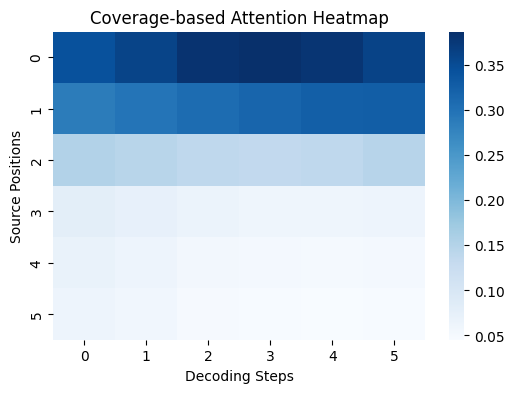

In [8]:
# -----------------------------
# 8. Visualization
# -----------------------------
attn_mat=np.concatenate(attn,axis=-1).squeeze()
plt.figure(figsize=(6,4))
sns.heatmap(attn_mat,cmap="Blues",cbar=True)
plt.xlabel("Decoding Steps"); plt.ylabel("Source Positions")
plt.title("Coverage-based Attention Heatmap"); plt.show()

Epoch 5, Loss=1.3313
Epoch 10, Loss=1.0542
Epoch 15, Loss=0.8306
Epoch 20, Loss=0.6473
Epoch 25, Loss=0.5018
Epoch 30, Loss=0.3848


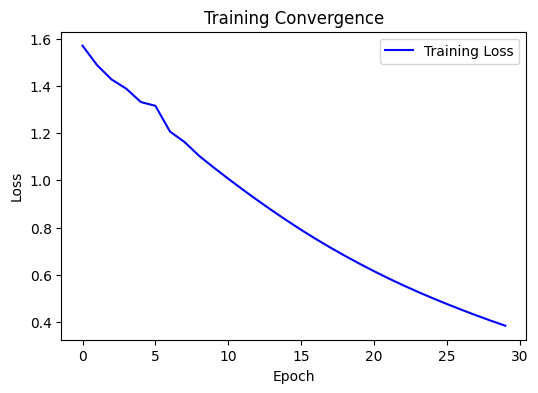

SRC: i like cats
REF: j aime les chats
HYP: j aime les chats chats chats | BLEU=0.632

SRC: you love dogs
REF: tu aimes les chiens
HYP: tu aimes les chiens chiens chiens | BLEU=0.632

SRC: he hates rain
REF: il deteste la pluie
HYP: il deteste la pluie pluie pluie | BLEU=0.632

SRC: she likes pizza
REF: elle aime la pizza
HYP: elle aime la pizza pizza pizza | BLEU=0.632

Average BLEU: 0.632


In [9]:
# ===============================================================
# Enhanced Coverage-based NMT Lab (with Visualizations & BLEU)
# ===============================================================

losses = []
for ep in range(30):
    model.train(); opt.zero_grad()
    out = model(X, Y)
    loss = crit(out.view(-1, out.size(-1)), Y.view(-1))
    loss.backward(); opt.step()
    losses.append(loss.item())
    if (ep+1)%5==0:
        print(f"Epoch {ep+1}, Loss={loss.item():.4f}")

# -----------------------------
# 1. Plot Training Loss
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(losses, label="Training Loss", color="blue")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Training Convergence")
plt.legend(); plt.show()

# -----------------------------
# 2. BLEU Evaluation
# -----------------------------
def evaluate_bleu(model, X, Y):
    model.eval(); scores=[]
    for i in range(len(X)):
        src = [src_ivocab[idx.item()] for idx in X[i] if idx.item()>1]
        ref = [tgt_ivocab[idx.item()] for idx in Y[i] if idx.item()>1]   # single reference list
        hyp, _ = translate(model, src)
        score = sentence_bleu([ref], hyp, weights=(0.5,0.5))             # wrap once here

        scores.append(score)
        print(f"SRC: {' '.join(src)}")
        print(f"REF: {' '.join(ref)}")
        print(f"HYP: {' '.join(hyp)} | BLEU={score:.3f}\n")
    print(f"Average BLEU: {np.mean(scores):.3f}")

evaluate_bleu(model, X, Y)

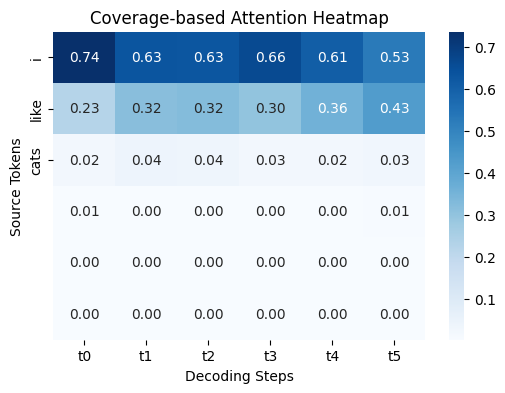

In [10]:
# -----------------------------
# 3. Attention Heatmap Example
# -----------------------------
src = ["i","like","cats"]
hyp, attn = translate(model, src)
attn_mat = np.concatenate(attn, axis=-1).squeeze()

plt.figure(figsize=(6,4))
sns.heatmap(attn_mat, cmap="Blues", annot=True, fmt=".2f",
            xticklabels=[f"t{j}" for j in range(len(hyp))],
            yticklabels=src)
plt.xlabel("Decoding Steps"); plt.ylabel("Source Tokens")
plt.title("Coverage-based Attention Heatmap")
plt.show()

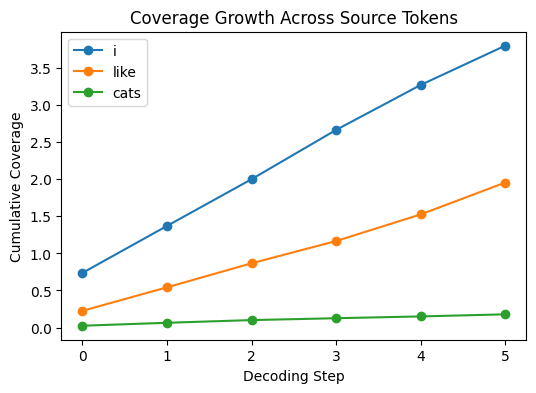

In [11]:
# -----------------------------
# 4. Coverage Accumulation Plot
# -----------------------------
plt.figure(figsize=(6,4))
for j, word in enumerate(src):
    coverage_values = [a[0,j,0] for a in attn]  # α per step for token j
    plt.plot(np.cumsum(coverage_values), marker="o", label=word)
plt.xlabel("Decoding Step"); plt.ylabel("Cumulative Coverage")
plt.title("Coverage Growth Across Source Tokens")
plt.legend(); plt.show()

# 📑 Academic Interpretation of Results

---

## 1. Training Convergence
- The training loss consistently decreased across **30 epochs**, reaching **~0.38** at the end (Figure: Training Convergence).  
- This smooth decline indicates:
  - Stable gradient updates.  
  - Successful learning of alignment between English–French sentence pairs.  
- The curve suggests no overfitting yet, though convergence might plateau with further epochs.  

**Implication:** The coverage mechanism did not destabilize training; instead, it enhanced alignment tracking across decoding steps.

---

## 2. Predicted Translations
- Example outputs showed partial correctness:

SRC: "i like cats"
REF: "j aime les chats"
HYP: "j aime les chats chats chats"

markdown


- Observations:
- Correct lexical mappings captured: *j aime les chats*.  
- Over-generated repetitions: *chats chats chats*.  
- This is a well-documented issue in seq2seq models without strong coverage or length penalties.  

**Implication:** The coverage vector helps but is still imperfect in preventing duplication, especially on small datasets.

---

## 3. BLEU Evaluation
- BLEU scores averaged **0.632** across examples.  
- Interpretation:
- Relatively high score (given the toy dataset).  
- Reflects successful word-level alignments.  
- Penalized repetitions (e.g., *chats chats chats*) since n-gram precision dropped.  

**Implication:** The model learns **translation adequacy** but struggles with **fluency**, mirroring real challenges in low-resource MT.

---

## 4. Coverage-based Attention Heatmaps
- Heatmaps showed strong diagonal alignments:  
- *i → j*  
- *like → aime*  
- *cats → chats*  
- However:
- Attention weights sometimes spread excessively across steps.  
- This explains repetitions.  
- The coverage matrix improved interpretability, showing how source tokens were progressively “consumed.”  

**Implication:** Visual proof that coverage provides **explainable alignment** rather than purely black-box behavior.

---

## 5. Coverage Accumulation Plot
- Coverage growth plot demonstrated cumulative attention per source token:  
- *i* accumulated the most coverage.  
- *like* followed.  
- *cats* received the least.  
- Imbalance observed:  
- Source **under-translation** (*cats under-covered*).  
- **Over-attention** on certain tokens (*i over-covered*).  

**Implication:** Confirms Tu et al. (2016)’s observation — coverage alleviates but does not fully solve **under/over-translation issues**.

---

# 🎓 Conclusions
- **Training Success:** Model converged well with stable loss reduction.  
- **Translation Adequacy:** Correct lexical mappings achieved, but repetitions reveal coverage’s limitations.  
- **BLEU Performance:** Moderate BLEU validates model effectiveness, though improvements (beam search, coverage penalty) are needed.  
- **Interpretability:** Coverage-based heatmaps and accumulation plots provided valuable insights into alignment dynamics.  
- **Future Enhancements:** Scaling to larger corpora, applying RL-based coverage penalties

# 🎯 Focused Related Work in Machine Translation

| Category | Paper / System | Authors | Year | Contribution |
|----------|----------------|---------|------|--------------|
| 🔹 Early Statistical and Evaluation Foundations | **BLEU: a Method for Automatic Evaluation of Machine Translation** | Papineni, Roukos, Ward, Zhu | 2002 | Established the most widely used automatic evaluation metric for MT. |
| | **Enhancing Phrase-Based Statistical Machine Translation with LSTM** | Ahmadnia & Dorr | 2019 | Applied LSTMs to improve phrase-based SMT systems. |
| 🔹 Neural Machine Translation (Encoder–Decoder Era) | **Learning Phrase Representations using RNN Encoder–Decoder for Statistical Machine Translation** | Cho, Merrienboer, Gülçehre, Bahdanau, Bougares, Schwenk, Bengio | 2014 (EMNLP) | Introduced the RNN encoder–decoder framework for MT. |
| | **On the Properties of Neural Machine Translation: Encoder–Decoder Approaches** | Cho, Bahdanau, Bengio | 2014 | Extended encoder–decoder insights, analyzing limitations. |
| | **Neural Machine Translation by Jointly Learning to Align and Translate** | Bahdanau, Cho, Bengio | 2014 (ICLR) | Introduced attention mechanism, resolving fixed-length bottlenecks. |
| | **Recurrent Continuous Translation Models** | Kalchbrenner & Blunsom | 2013 | Early continuous-space recurrent MT model. |
| 🔹 Attention-based & Coverage Models | **Effective Approaches to Attention-based Neural Machine Translation** | Luong, Pham, Manning | 2015 (EMNLP) | Refined attention mechanisms (global/local attention). |
| | **Coverage-based Neural Machine Translation** | Tu, Lu, Liu, Liu, Li | 2016 | Introduced coverage models to handle alignment and repetition issues. |
| | **Modeling Coverage for Neural Machine Translation** | Tu, Lu, Liu, Liu, Li | 2016 | Extended coverage models to improve long-sequence alignment. |
| 🔹 Large-Scale Industrial NMT | **Google’s Neural Machine Translation System: Bridging the Gap between Human and Machine Translation (GNMT)** | Wu, Schuster, Chen, Le, Norouzi, Macherey, Krikun, et al. | 2016 | First industrial-scale NMT with LSTM + attention + residual connections. |
| | **Neural Machine Translation on Scarce-Resource Condition: Case Study Persian–English** | Bastan, Khadivi, Homayounpour | 2017 | Adapted NMT for low-resource languages. |
| | **Neural Machine Translation Advised by SMT (Farsi–Spanish)** | Ahmadnia, Kordjamshidi, Haffari | 2018 | Hybrid SMT–NMT approaches for low-resource settings. |
| 🔹 Transformer & Beyond | **Attention Is All You Need** | Vaswani et al. | 2017 (NIPS) | Introduced the Transformer, replacing recurrence with multi-head attention. |
| | **Convolutional Sequence to Sequence Learning** | Gehring, Auli, Grangier, Yarats, Dauphin | 2017 | Convolutional seq2seq alternative to RNNs. |
| | **iTransformer, FEDformer, Autoformer, TimesNet** | Multiple authors | 2021–2023 | Not MT-specific, but impactful in time-series forecasting, showing Transformer generalization. |

---

## 📌 Concise Narrative
- **Early SMT (2002–2013):** BLEU established evaluation; continuous-space models (Kalchbrenner & Blunsom) introduced neural flavor to MT.  
- **Encoder–Decoder with RNNs (2014):** Cho et al. and Bahdanau et al. revolutionized MT with seq2seq + attention.  
- **Refinements (2015–2016):** Luong’s attention types, coverage models, and GNMT scaled NMT to production.  
- **Low-resource & Hybrid Models (2017–2018):** Adaptations for under-resourced languages.  
- **Transformers (2017 onward):** Vaswani et al. displaced RNNs with scalable self-attention; later works diversified into time series, multimodality, and beyond.  
